In [84]:
!pip3 install imblearn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("/Users/danort/Desktop/Ironhack labs/unit4/cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")


In [85]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,sales_channel_web,vehicle_class_four-door_car,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two-door_car,day,day_of_week,month
0,BU79786,0.010629,No,NaN,Bachelor,2011-02-24,NaN,F,0.562847,NaN,...,False,False,False,False,False,False,True,24,Thursday,February
1,QZ44356,0.062406,No,NaN,Bachelor,2011-01-31,NaN,F,0.000000,NaN,...,False,True,False,False,False,False,False,31,Monday,January
2,AI49188,0.134960,No,NaN,Bachelor,2011-02-19,NaN,F,0.487763,NaN,...,False,False,False,False,False,False,True,19,Saturday,February
3,WW63253,0.070589,No,NaN,Bachelor,2011-01-20,NaN,M,0.000000,NaN,...,False,False,False,False,True,False,False,20,Thursday,January
4,HB64268,0.011245,No,NaN,Bachelor,2011-02-03,NaN,M,0.438443,NaN,...,False,True,False,False,False,False,False,3,Thursday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,0.264137,No,NaN,Bachelor,2011-02-10,NaN,M,0.719547,NaN,...,True,True,False,False,False,False,False,10,Thursday,February
9130,PK87824,0.014719,Yes,NaN,College,2011-02-12,NaN,F,0.216081,NaN,...,False,True,False,False,False,False,False,12,Saturday,February
9131,TD14365,0.076951,No,NaN,Bachelor,2011-02-06,NaN,M,0.000000,NaN,...,False,True,False,False,False,False,False,6,Sunday,February
9132,UP19263,0.069098,No,NaN,College,2011-02-03,NaN,M,0.219452,NaN,...,False,True,False,False,False,False,False,3,Thursday,February


In [91]:
# Identify continuous variables (float64 or int64)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Identify discrete variables (object or int64 with limited unique values)
categorical_df = df.select_dtypes(include=['object', 'int64'])

# Check unique values in each column of the categorical_df
unique_counts = df.nunique()

# Identify columns with a limited number of unique values (threshold set to 10 in this example)
discrete_columns = unique_counts[unique_counts <= 10].index
categorical_df = df[discrete_columns]

# 1. Open the categoricals variable we created before.


In [92]:
categoricals_df = df.select_dtypes(object)
categoricals_df.head()

,customer,response,education,gender,day_of_week,month
0,BU79786,No,Bachelor,F,Thursday,February
1,QZ44356,No,Bachelor,F,Monday,January
2,AI49188,No,Bachelor,F,Saturday,February
3,WW63253,No,Bachelor,M,Thursday,January
4,HB64268,No,Bachelor,M,Thursday,February


# 2. Plot all the categorical variables with the proper plot. What can you see?

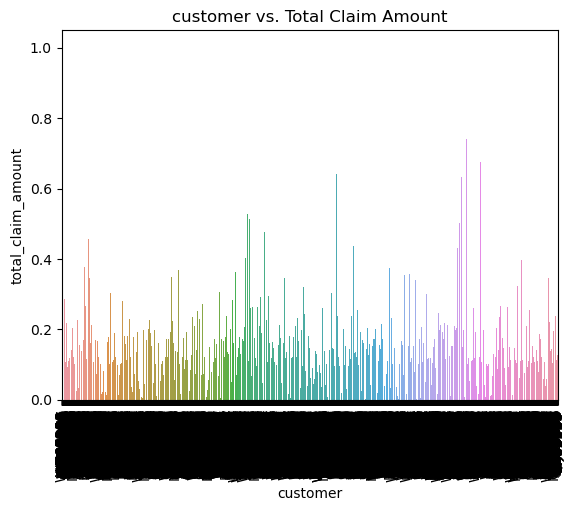

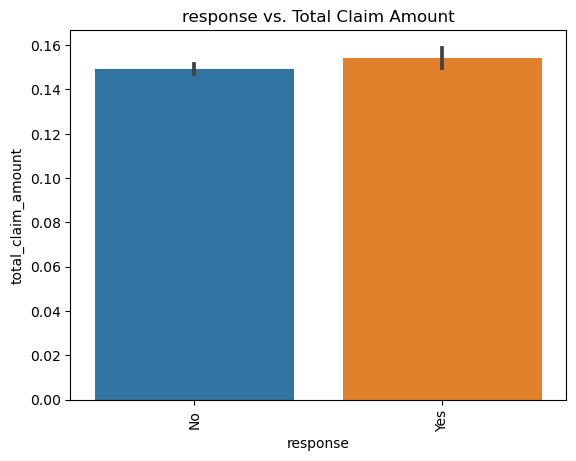

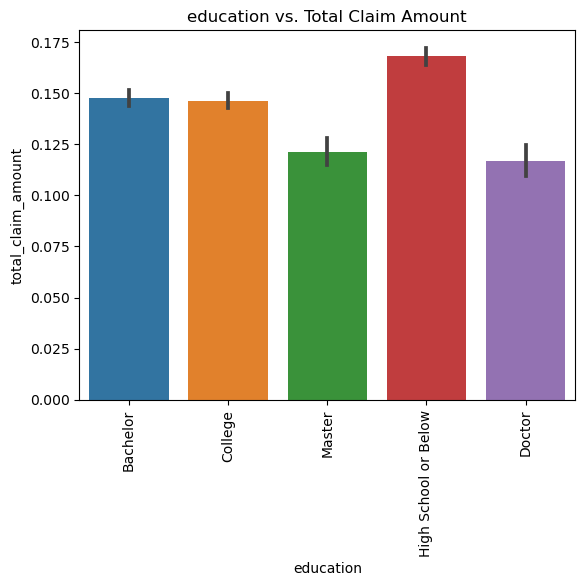

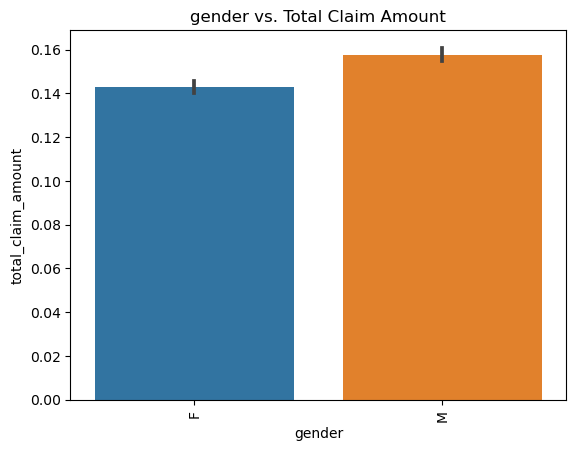

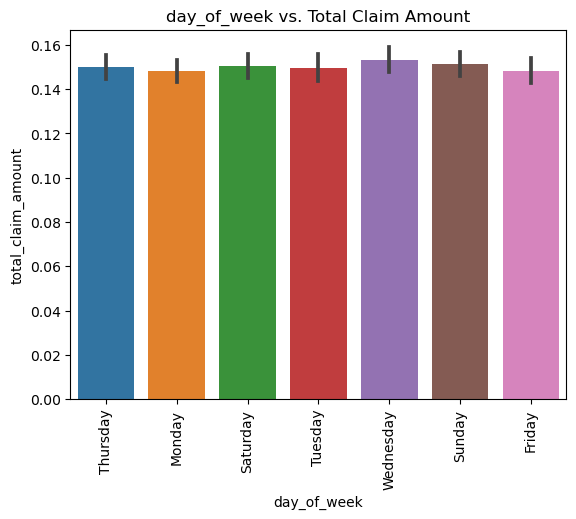

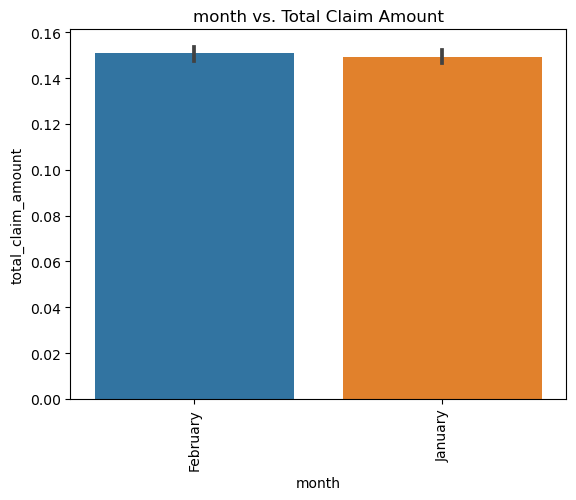

In [93]:
for col in categoricals.columns:
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs. Total Claim Amount')
    plt.show()
    
    # we can visualize the average or total value of the target variable for each category.
    # We can also countplot our categorical vrs the target value to see the distribution.

In [94]:
# Let's convert "effective_to_date" to a datetime formart.
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
print(df.dtypes)

customer                                 object
customer_lifetime_value                 float64
response                                 object
coverage                                float64
education                                object
effective_to_date                datetime64[ns]
employmentstatus                        float64
gender                                   object
income                                  float64
location_code                           float64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
total_claim_amount                      float64
vehicle_size                            float64
days_since_start                          int64
state_arizona                              bool
state_california                           bool
state_nevada                            

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Extract numerical features from the date column (example: days since the earliest date)
df['days_since_start'] = (df['effective_to_date'] - df['effective_to_date'].min()).dt.days

# Select features and target
X = df[['days_since_start']]  # Use double brackets to keep X as a DataFrame
y = df['total_claim_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Reshape the 1D arrays to 2D arrays
X_train_std = X_train_std.reshape(-1, 1)
X_test_std = X_test_std.reshape(-1, 1)

# Fit the model
lr = LinearRegression()
lr.fit(X_train_std, y_train)

# Make predictions
predictions = lr.predict(X_test_std)

# Evaluate the model
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: -0.002933371216732983
MAE: 204.41095024989693
RMSE: 282.39029049694255


In [95]:
values_redundant = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
values_redundant

days_since_start    0.321829
dtype: float64

# 4. Plot time variable. Can you extract something from it?

<Axes: >

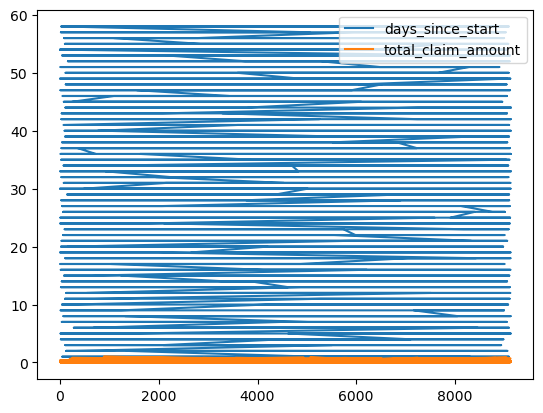

In [96]:
df[["days_since_start", "total_claim_amount"]].sort_values("days_since_start").plot()

# Lab Data cleaning & wrangling.

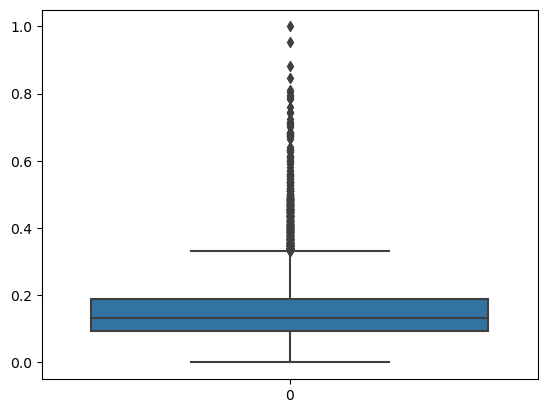

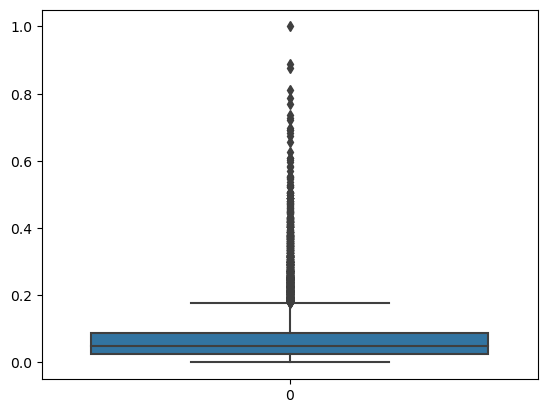

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,sales_channel_web,vehicle_class_four-door_car,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two-door_car,day,day_of_week,month
6037,UM17151,0.0,No,NaN,Bachelor,2011-02-26,NaN,M,0.0,NaN,...,False,False,False,False,False,False,True,26,Saturday,February


In [97]:
# Removing outliers.

# we used this plot to check for outliers
sns.boxplot(df['total_claim_amount'])
plt.show()


# both are same and the best for ploting to check for outliers
sns.boxplot(df['customer_lifetime_value'])
plt.show()

# what I would do with the outliers is check and plot the features, removing the zeros 0
# Also we can see that there is no zero as outliers in our target variable.

df[df['total_claim_amount'] == 0]

#Also for customer_lifetime_value.

df[df['customer_lifetime_value'] == 0]



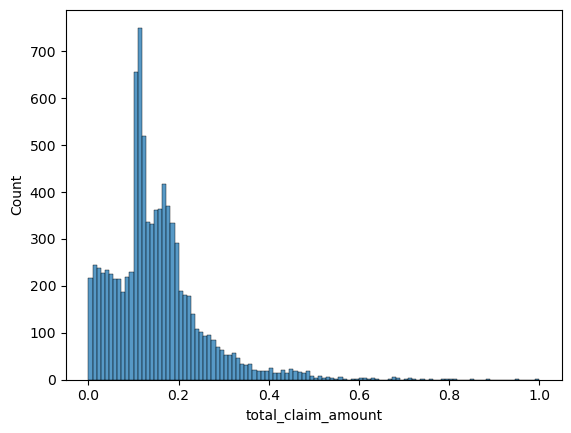

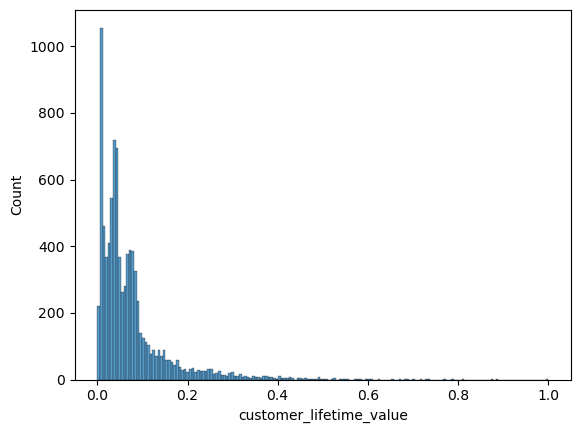

In [98]:
# getting a better look at the distribution:
sns.histplot(df['total_claim_amount'])
plt.show()

sns.histplot(df['customer_lifetime_value'])
plt.show()

# 1. Removing outliers.

In [99]:
df[df['income'] == 0]

,customer,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,sales_channel_web,vehicle_class_four-door_car,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two-door_car,day,day_of_week,month
1,QZ44356,0.062406,No,NaN,Bachelor,2011-01-31,NaN,F,0.0,NaN,...,False,True,False,False,False,False,False,31,Monday,January
3,WW63253,0.070589,No,NaN,Bachelor,2011-01-20,NaN,M,0.0,NaN,...,False,False,False,False,True,False,False,20,Thursday,January
7,CF85061,0.065311,No,NaN,Master,2011-01-18,NaN,M,0.0,NaN,...,False,True,False,False,False,False,False,18,Tuesday,January
10,SX51350,0.034890,No,NaN,College,2011-02-21,NaN,M,0.0,NaN,...,False,True,False,False,False,False,False,21,Monday,February
11,VQ65197,0.077360,No,NaN,College,2011-01-06,NaN,F,0.0,NaN,...,False,False,False,False,True,False,False,6,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,WZ45103,0.046422,Yes,NaN,Bachelor,2011-01-19,NaN,F,0.0,NaN,...,False,True,False,False,False,False,False,19,Wednesday,January
9125,RX91025,0.220740,No,NaN,High School or Below,2011-01-31,NaN,M,0.0,NaN,...,False,False,False,False,True,False,False,31,Monday,January
9126,AC13887,0.033539,No,NaN,Bachelor,2011-01-09,NaN,M,0.0,NaN,...,False,False,False,False,False,False,True,9,Sunday,January
9131,TD14365,0.076951,No,NaN,Bachelor,2011-02-06,NaN,M,0.0,NaN,...,False,True,False,False,False,False,False,6,Sunday,February


In [100]:
# removing outliers from income & total_claim_amount.

df_filtered = df[df['income'] != 0]

# - removing the outliers with a funtion.

In [101]:
#removing the outliers with a funtion.
def remove_outliers_iqr(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    df_filtered = df[(df[column_name] > Q1 - 1.5 * IQR) & (df[column_name] < Q3 + 1.5 * IQR)]

    return df_filtered

# filtring the income column into my data frame.
your_dataframe_filtered = remove_outliers_iqr(df, 'income')

<Axes: xlabel='income', ylabel='Count'>

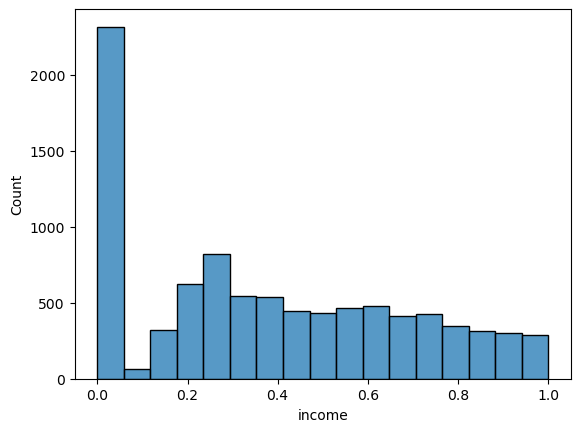

In [102]:
sns.histplot(df['income'])

# 2. Create a copy of the DataFrame for data wrangling

In [103]:
# Create a copy of the DataFrame for data wrangling
data_wrangling = df.copy()

# 3. Normalize the continuous variables.

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and 'continuous_columns' is a list of continuous variable column names
continuous_columns = ['income', 'total_claim_amount', 'customer_lifetime_value']  # Replace with your actual column names

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the specified continuous columns
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Now, 'df' contains the normalized values for the continuous columns

# 4. Encode the categorical variables.


In [105]:
# Encoding ordinal to the following columns
df["coverage"] = df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

# ordinal to employmentstatus.
df["employmentstatus"] = df["employmentstatus"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

# ordinal to location_code.
df["location_code"] = df ["location_code"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

# ordinal to vehicle_size.

df["vehicle_size"] = df ["vehicle_size"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})





In [114]:

# Specify the columns you want to dummy encode
#-columns_to_dummy = ['state', 'marital_status', 'policy_type', 'policy','renew_offer_type', 'sales_channel', 'vehicle_class']

# Use pd.get_dummies() to dummy encode the specified columns
#-df = pd.get_dummies(df, columns=columns_to_dummy)


# 5. Transforming and extracting features from my Time variable, to make the useful.

In [107]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

# Extract day of the week and month as integers
df['day_of_week'] = df['effective_to_date'].dt.dayofweek
df['month'] = df['effective_to_date'].dt.month

# We can create a dictionary to map day of the week and month to their respective names values.
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map day of the week and month to their respective names
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)
df['month'] = df['month'].map(month_mapping)

In [109]:
categoricals_df

,customer,response,education,gender,day_of_week,month
0,BU79786,No,Bachelor,F,Thursday,February
1,QZ44356,No,Bachelor,F,Monday,January
2,AI49188,No,Bachelor,F,Saturday,February
3,WW63253,No,Bachelor,M,Thursday,January
4,HB64268,No,Bachelor,M,Thursday,February
...,...,...,...,...,...,...
9129,LA72316,No,Bachelor,M,Thursday,February
9130,PK87824,Yes,College,F,Saturday,February
9131,TD14365,No,Bachelor,M,Sunday,February
9132,UP19263,No,College,M,Thursday,February


In [110]:
# Identify categorical columns
categorical_columns = ['customer', 'response', 'education', 'gender','day_of_week', 'month']



In [111]:
# One-hot encode all categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_columns)


In [112]:
# Check data types of each column
column_data_types = data_encoded.dtypes
column_data_types

customer_lifetime_value           float64
coverage                          float64
effective_to_date          datetime64[ns]
employmentstatus                  float64
income                            float64
                                ...      
day_of_week_Thursday                 bool
day_of_week_Tuesday                  bool
day_of_week_Wednesday                bool
month_February                       bool
month_January                        bool
Length: 9201, dtype: object

In [113]:
# Check if all columns have numerical data types
all_numerical = all(column_data_types.isin([int, float]))

if all_numerical:
    print("All columns are numerical.")
else:
    print("Not all columns are numerical.")

Not all columns are numerical.
